In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import pandas as pd

# Load all three CSV files
df_soil = pd.read_csv("soil_crop.csv")
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

# Show top rows of each
print("Soil + Weather + Crop Dataset")
display(df_soil.head())

print("\nGeneral Crop Dataset 1")
display(df1.head())

print("\nGeneral Crop Dataset 2")
display(df2.head())

Soil + Weather + Crop Dataset


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley



General Crop Dataset 1


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



General Crop Dataset 2


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("df_soil columns:", df_soil.columns.tolist())
print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())


df_soil columns: ['Soilcolor', 'Ph', 'K', 'P', 'N', 'Zn', 'S', 'QV2M-W', 'QV2M-Sp', 'QV2M-Su', 'QV2M-Au', 'T2M_MAX-W', 'T2M_MAX-Sp', 'T2M_MAX-Su', 'T2M_MAX-Au', 'T2M_MIN-W', 'T2M_MIN-Sp', 'T2M_MIN-Su', 'T2M_MIN-Au', 'PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su', 'PRECTOTCORR-Au', 'WD10M', 'GWETTOP', 'CLOUD_AMT', 'WS2M_RANGE', 'PS', 'label']
df1 columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
df2 columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [ ]:
# Make all column names lowercase for consistency
df_soil.columns = df_soil.columns.str.lower()
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [ ]:
# Pick only soil + weather related columns
df_soil_selected = df_soil[['ph', 'n', 'p', 'k', 'zn', 's', 't2m_max-w', 't2m_max-su', 'qv2m-su']]


In [ ]:
# Reset index and merge row-wise (assuming same length)
df_combined = pd.concat([df1.reset_index(drop=True), df_soil_selected.reset_index(drop=True)], axis=1)

# Check result
df_combined.head()


,n,p,k,temperature,humidity,ph,rainfall,label,ph,n,p,k,zn,s,t2m_max-w,t2m_max-su,qv2m-su
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,5.81,0.23,5.401,738.231,2.976000,13.816,26.853333,23.06,11.963333
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,5.43,0.23,10.478,606.382,3.077000,16.421,26.853333,23.06,11.963333
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,5.41,0.23,6.847,386.580,6.611000,16.557,26.853333,23.06,11.963333
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,5.65,0.23,3.418,207.086,0.460181,16.075,26.853333,23.06,11.963333
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,5.27,0.23,39.282,317.357,2.743000,12.558,26.853333,23.06,11.963333


In [ ]:
# Check for missing values
print(df_combined.isnull().sum())

# Optionally fill or drop
df_combined = df_combined.dropna()


n              1667
p              1667
k              1667
temperature    1667
humidity       1667
ph             1667
rainfall       1667
label          1667
ph                0
n                 0
p                 0
k                 0
zn                0
s                 0
t2m_max-w         0
t2m_max-su        0
qv2m-su           0
dtype: int64


In [ ]:
X = df_combined.drop('label', axis=1)
y = df_combined['label']



In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      1.00      1.00        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0

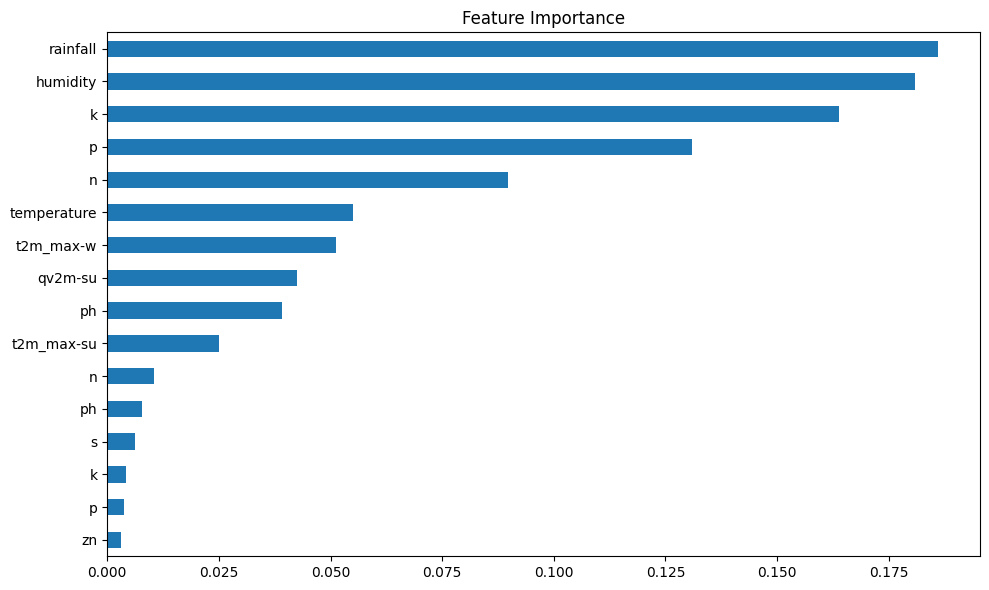

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
# ---- Predict Best Crop for Given Input Features ----

input_data = {
    'n': 90,
    'p': 42,
    'k': 43,
    'temperature': 21.5,
    'humidity': 82.0,
    'ph': 6.5,
    'rainfall': 202.9,
    'zn': 1.2,
    's': 10.5,
    't2m_max-w': 35.0,
    't2m_max-su': 40.2,
    'qv2m-su': 16.8
}

input_df = pd.DataFrame([input_data])

# ✅ Ensure correct column order
input_df = input_df[X.columns]

# Predict
predicted_crop = model.predict(input_df)[0]

print(f"\n✅ Recommended Crop for the given conditions: {predicted_crop}")



✅ Recommended Crop for the given conditions: jute



Feature ranking:
1. rainfall (0.1861)
2. humidity (0.1808)
3. k (0.1639)
4. p (0.1310)
5. n (0.0897)
6. temperature (0.0551)
7. t2m_max-w (0.0512)
8. qv2m-su (0.0424)
9. ph (0.0392)
10. t2m_max-su (0.0250)
11. n (0.0104)
12. ph (0.0078)
13. s (0.0063)
14. k (0.0041)
15. p (0.0039)
16. zn (0.0030)


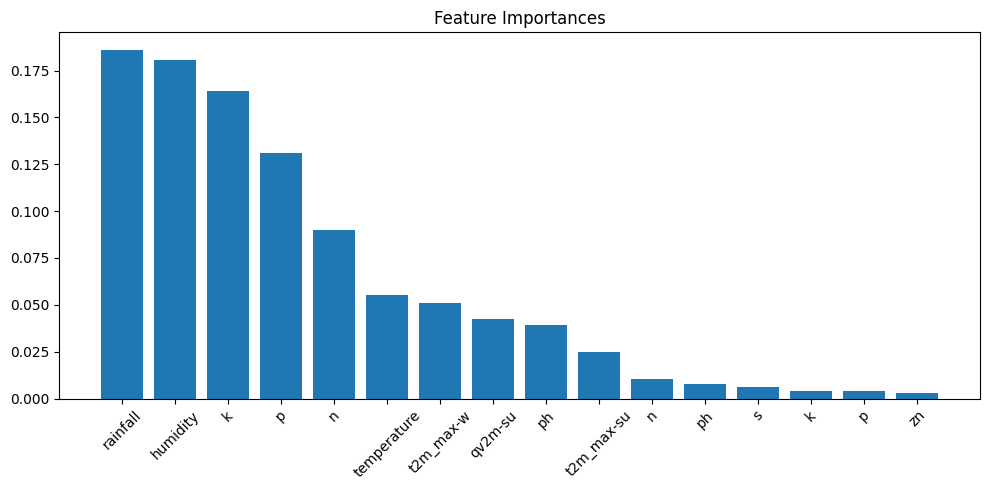

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print ranking
print("\nFeature ranking:")
for i in range(len(X.columns)):
    print(f"{i+1}. {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model , 'crop_model.pkl')  # This saves the model in the same folder
print("✅ Model saved successfully as crop")

✅ Model saved successfully as crop


In [ ]:
!pip install streamlit
